In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from vae_lib.nn.simple_nn import SimpleNN
import vae_lib.utils.nn_logger as log
import tensorflow as tf
from vae_lib.nn.stochastic_nn_with_gmm import StochasticNNWithGmm
import numpy as np
from vae_lib.graphics.plot_utils import plot_2d_latent_space


In [2]:
sms_path = "/Users/mjankowski/doc/data/smsSpam"

In [3]:
base_path = '/Users/mjankowski/doc/data/poliblog/for_python/'
poliblog_path = "/Users/mjankowski/doc/data/poliblog/train"

In [4]:
poliblog_data_train = pd.read_csv(base_path+'poliblog.data.train.csv').values
poliblog_data_test = pd.read_csv(base_path+'poliblog.data.test.csv').values

In [5]:
poliblog_ratings_train = pd.read_csv(base_path+'poliblog.ratings.train.csv', header=None).values.reshape((-1,1))
poliblog_ratings_test = pd.read_csv(base_path+'poliblog.ratings.test.csv', header=None).values.reshape((-1,1))

In [46]:
1-np.sum(poliblog_ratings_test)/len(poliblog_ratings_test)

0.625

In [6]:
len(poliblog_ratings_train)

573

In [44]:
np.sum(poliblog_ratings_train)/len(poliblog_ratings_train)

0.4083769633507853

In [8]:
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
onehot_encoder.fit(poliblog_ratings_train)

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [9]:
poliblog_ratings_train_one_hot = onehot_encoder.transform(poliblog_ratings_train)
poliblog_ratings_test_one_hot = onehot_encoder.transform(poliblog_ratings_test)

In [10]:
tf.reset_default_graph()
log_folder = log.get_log_folder()
print("Writing logs to: {}".format(log_folder))
simple_nn = SimpleNN([1290, 128, 2], learning_rate=1e-3, log_folder=log_folder)
simple_nn.fit(
    poliblog_data_train, 
    poliblog_ratings_train_one_hot, 
    poliblog_data_test, 
    poliblog_ratings_test_one_hot, 
    epochs=10, 
    log_interval=10
)

Writing logs to: /tmp/class_vae/deep/24_04_2019/20190424165806
Train accuracy: 97.21%
Test accuracy: 79.5%


In [41]:
#tf.reset_default_graph()
log_folder = log.get_log_folder()
print('Starting autoencoder. Log folder={}'.format(log_folder))

# init_cov = np.array([
#     [0.07,0.0],
#     [0.0,0.007]
# ], dtype="float64")

init_cov = np.array([
    [0.7,0.0],
    [0.0,0.07]
], dtype="float64")

model_supervised = StochasticNNWithGmm(
    x_dim=poliblog_data_train.shape[1],
    y_dim=poliblog_ratings_train_one_hot.shape[1],
    hidden_dims=[1024, 512, 256, 128, 2],
    log_folder=log_folder,
    alpha=0,
    beta=0,#0.1,
    gamma=1,
    omega=0.00014,
    r=0.8,
    K=2,
    init_cov=init_cov,
    is_latent_supervised=True
)
model_supervised.fit(
    X_train=poliblog_data_train, 
    y_train=poliblog_ratings_train_one_hot, 
    X_test=poliblog_data_test,
    y_test=poliblog_ratings_test_one_hot,
    epochs=30,
    log_interval=10
)

test_acc = model_supervised.calculate_accuracy(X=poliblog_data_test, y=poliblog_ratings_test_one_hot)
print("Test accuracy {}".format(test_acc))

Starting autoencoder. Log folder=/tmp/class_vae/deep/24_04_2019/20190424170550
Hidden shape: (?, 2)
self.posterior_predictive_probs_y.shape [None, 2]
self.y.shape [None, 2]
xy.shape [None, 1292]


/anaconda3/envs/vae_tests/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


n_batches: 8
epoch: 0
Train accuracy 0.5671902298927307
Test accuracy 0.6000000238418579
epoch: 1
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 2
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 3
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 4
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 5
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 6
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 7
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 8
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 9
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 10
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 11
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 12
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 13
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 14
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 15
Train accuracy

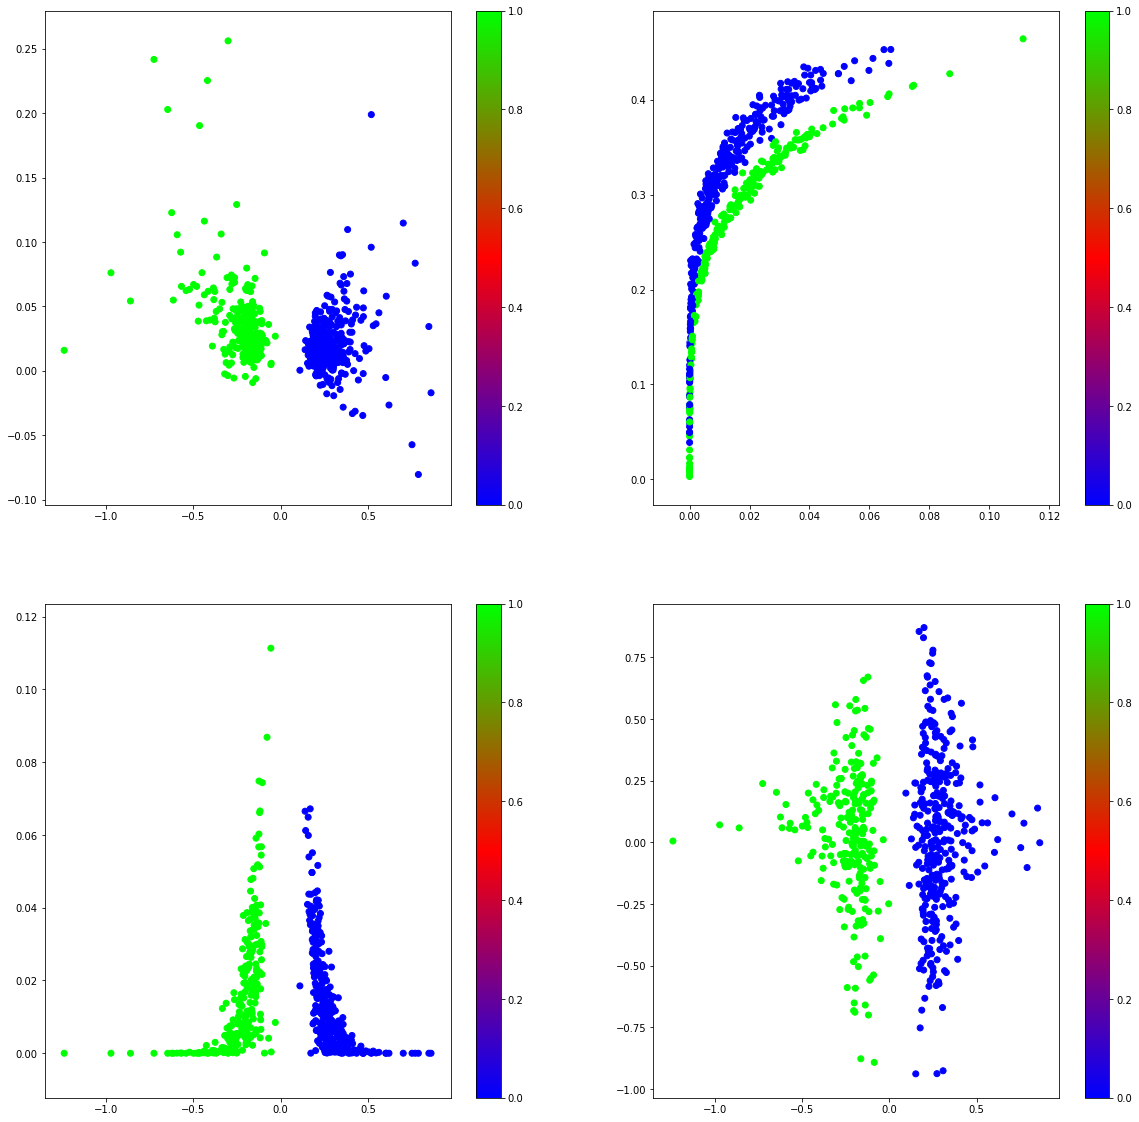

In [42]:
plot_2d_latent_space(model_supervised, onehot_encoder, poliblog_data_train, poliblog_ratings_train_one_hot)

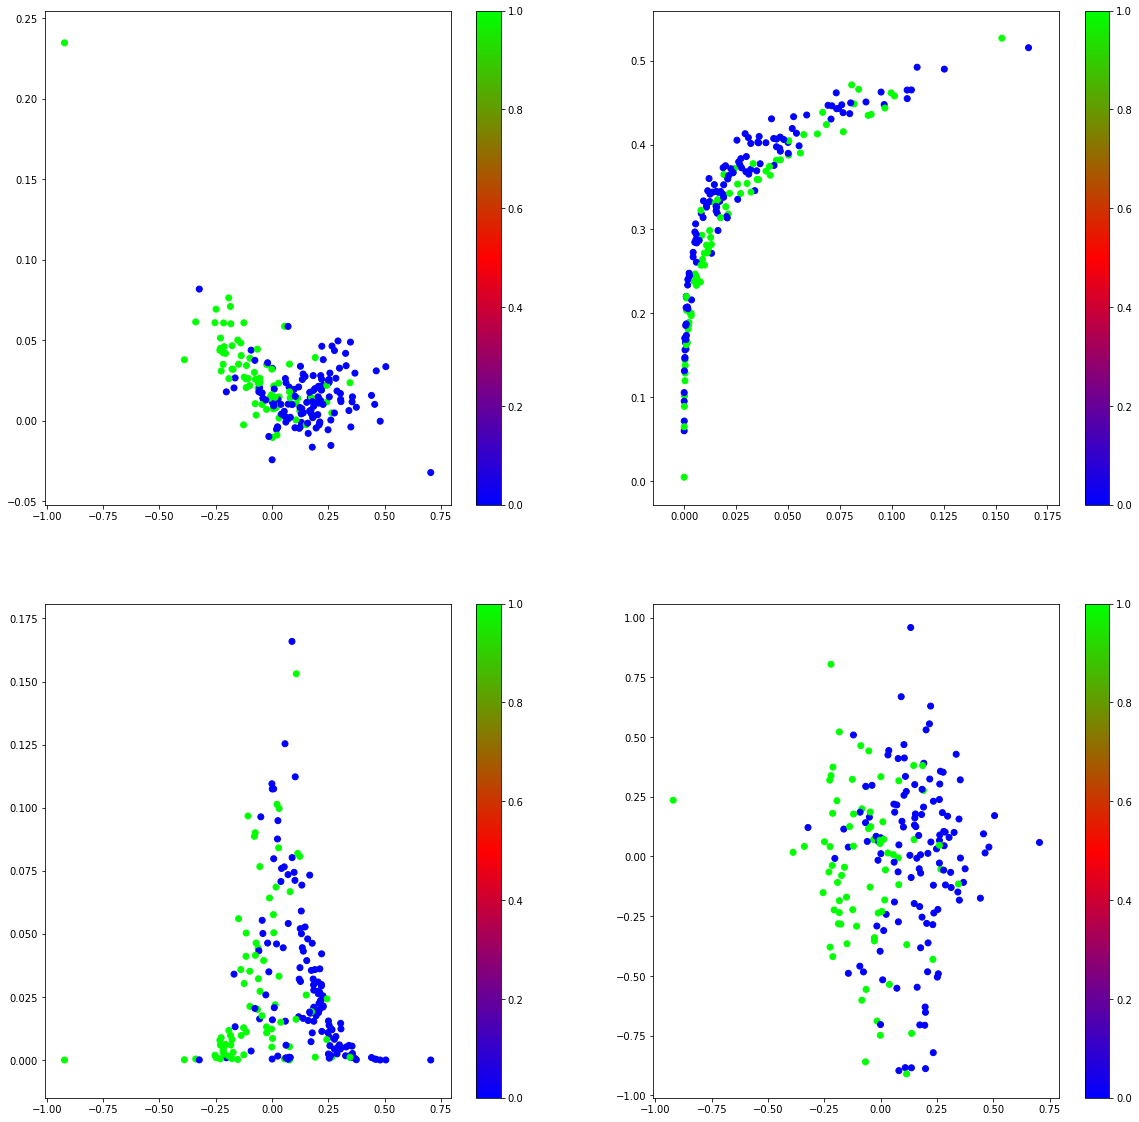

In [43]:
plot_2d_latent_space(model_supervised, onehot_encoder, poliblog_data_test, poliblog_ratings_test_one_hot)

## Sample from latent

In [87]:
#tf.reset_default_graph()
log_folder = log.get_log_folder()
print('Starting autoencoder. Log folder={}'.format(log_folder))

init_cov = np.array([
    [0.7,0.0],
    [0.0,0.07]
], dtype="float64")

model_supervised = StochasticNNWithGmm(
    x_dim=poliblog_data_train.shape[1],
    y_dim=poliblog_ratings_train_one_hot.shape[1],
    hidden_dims=[1024, 512, 256, 128, 2],
    log_folder=log_folder,
    alpha=0,
    beta=0,#0.1,
    gamma=1,
    omega=0.00014,
    r=0.8,
    K=2,
    init_cov=init_cov,
    is_latent_supervised=True
)
model_supervised.fit(
    X_train=poliblog_data_train, 
    y_train=poliblog_ratings_train_one_hot, 
    X_test=poliblog_data_test,
    y_test=poliblog_ratings_test_one_hot,
    epochs=30,
    log_interval=10
)

test_acc = model_supervised.calculate_accuracy(X=poliblog_data_test, y=poliblog_ratings_test_one_hot)
print("Test accuracy {}".format(test_acc))

Starting autoencoder. Log folder=/tmp/class_vae/deep/25_04_2019/20190425124435
Hidden shape: (?, 2)
self.posterior_predictive_probs_y.shape [None, 2]
self.y.shape [None, 2]
xy.shape [None, 1292]


/anaconda3/envs/vae_tests/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


n_batches: 8
epoch: 0
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 1
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 2
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 3
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 4
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 5
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 6
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 7
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 8
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 9
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 10
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 11
Train accuracy 0.5916230082511902
Test accuracy 0.625
epoch: 12
Train accuracy 0.783595085144043
Test accuracy 0.5899999737739563
epoch: 13
Train accuracy 0.7469459176063538
Test accuracy 0.5400000214576721
epoch: 14
Train accuracy 0.8184991478919983
Test accuracy 0.5899999737739563

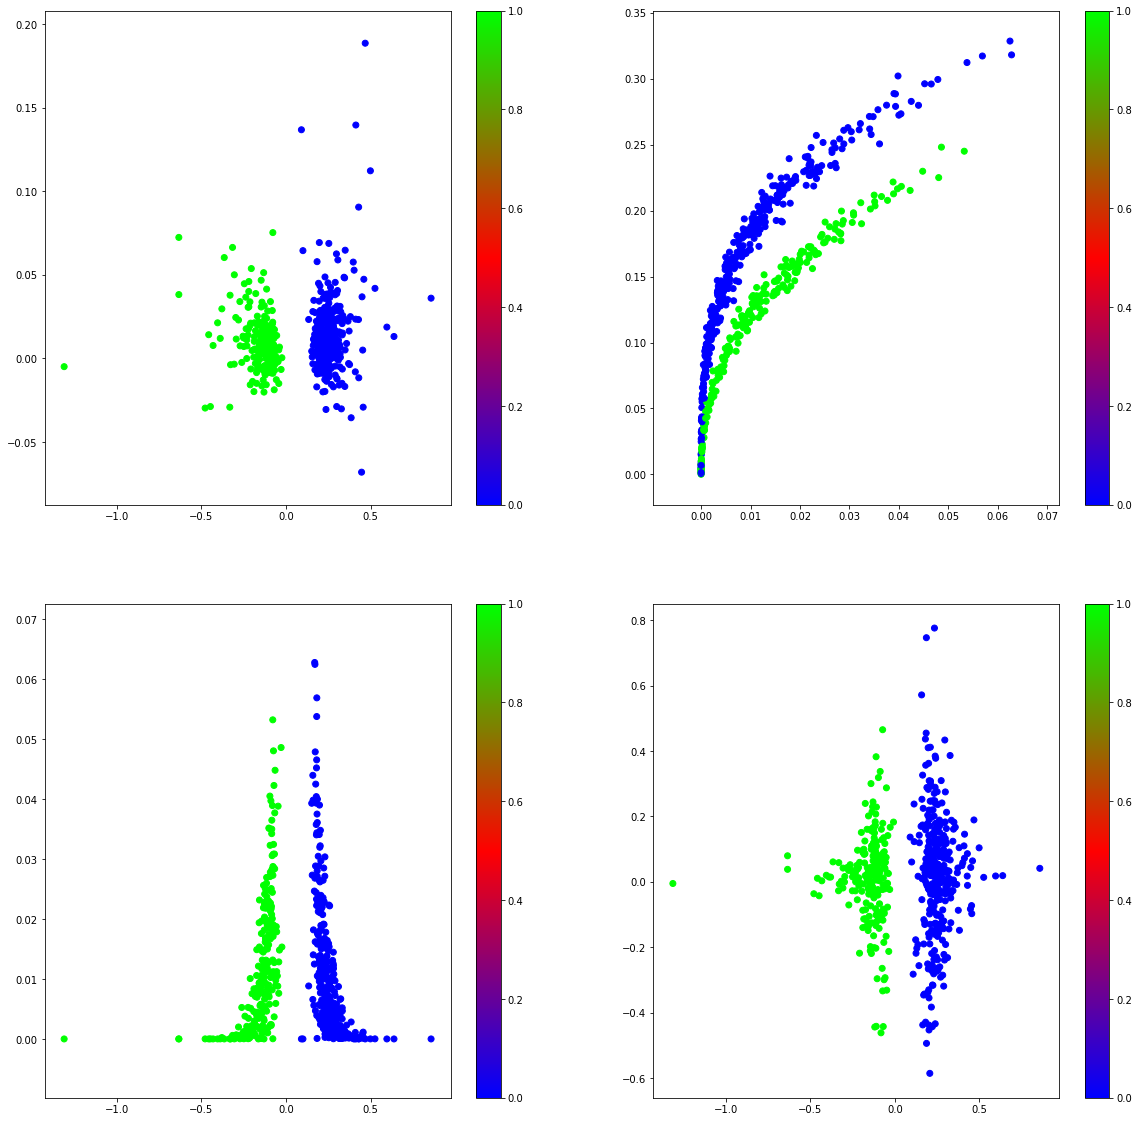

In [88]:
plot_2d_latent_space(model_supervised, onehot_encoder, poliblog_data_train, poliblog_ratings_train_one_hot)